In [104]:
import pandas as pd
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [105]:
# Dump all images into a folder and specify the path:
data_dir ="/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images"
print(data_dir)

/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images


In [106]:
dest_dir = "/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised"

In [107]:
breastCancer_df = pd.read_csv('/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/image_data.csv')
print(breastCancer_df['class'].value_counts())

class
0    198738
1     78786
Name: count, dtype: int64


In [108]:
label=breastCancer_df['class'].unique().tolist()  #Extract labels into a list
label_images = []
print(label)

[0, 1]


In [109]:
import os

# Set the destination directory path
dest_dir = os.path.abspath("/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised")  # Ensure correct absolute path
os.makedirs(dest_dir, exist_ok=True)

# Open a log file to track any missing images
log_file_path = "/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/process_log.txt"
with open(log_file_path, "w") as log_file:
    log_file.write("Processing Log:\n\n")

# Loop through labels and create subdirectories
for label_name in label:
    class_dir = os.path.join(dest_dir, str(label_name))
    os.makedirs(class_dir, exist_ok=True)  # Creates the directory if it doesn't exist
    print(f"Created directory: {class_dir}")

    # Process the images for the current label
    sample = breastCancer_df[breastCancer_df['class'] == label_name]['relative_path']
    for relative_path in sample:
        # Strip any folder paths and keep only the filename
        base_name = os.path.basename(relative_path)
        
        # Construct the source and destination paths
        src_path = os.path.join("/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images", base_name)
        dest_path = os.path.join(class_dir, base_name)
        
        # Move the image if the source file exists
        if os.path.exists(src_path):
            os.rename(src_path, dest_path)  # Move or copy the file
        else:
            # Log missing images to the file
            with open(log_file_path, "a") as log_file:
                log_file.write(f"Image not found: {src_path}\n")
            print(f"Image not found: {src_path}")

print("Processing complete. Missing images logged in 'process_log.txt'.")


Created directory: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised/0
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/13688_idx5_x1301_y851_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/13688_idx5_x551_y551_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/13688_idx5_x401_y551_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/13688_idx5_x751_y601_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/13688_idx5_x1151_y601_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/13688_idx5_x201_y601_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Projec

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x1351_y751_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x1001_y401_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x601_y1051_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x1051_y351_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x201_y901_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x351_y901_class0.png
Image not found: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/all_images/12892_idx5_x151_y901_class0.png
Image not found: /home/garv/Desktop/O

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [110]:
# Define data generator
datagen = ImageDataGenerator(rescale=1.0/255)

In [111]:
train_dir ="/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised"

# Verify that the directory exists and contains subfolders
if os.path.exists(train_dir):
    print(f"Directory exists: {train_dir}")
    print(f"Subfolders found: {os.listdir(train_dir)}")

    # Initialize the ImageDataGenerator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    
    # Load images from the subfolders
    train_data = datagen.flow_from_directory(directory=train_dir,
                                             target_size=(64, 64),
                                             batch_size=16,
                                             class_mode='categorical')
    print(train_data.class_indices)  # Check the class indices
else:
    print(f"Directory does not exist: {train_dir}")

Directory exists: /home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised
Subfolders found: ['0', '1']
Found 277524 images belonging to 2 classes.
{'0': 0, '1': 1}


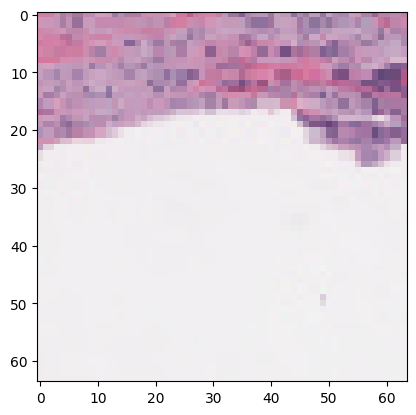

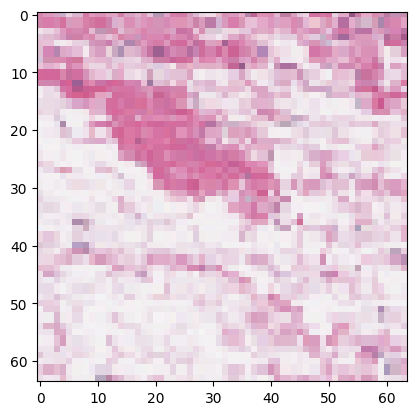

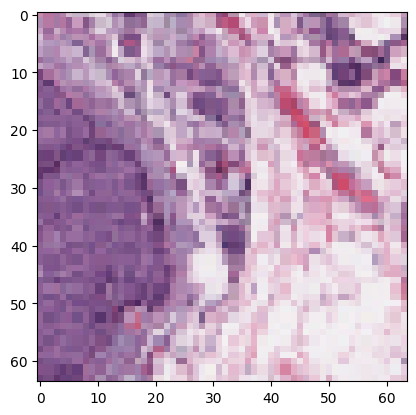

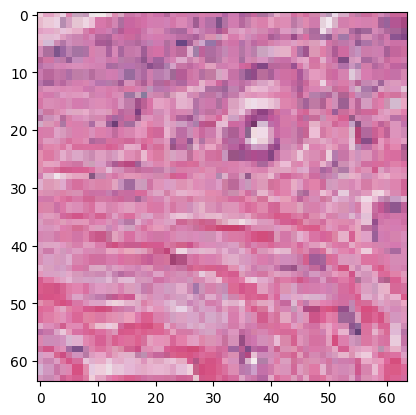

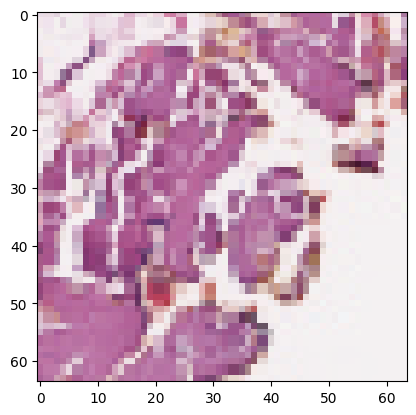

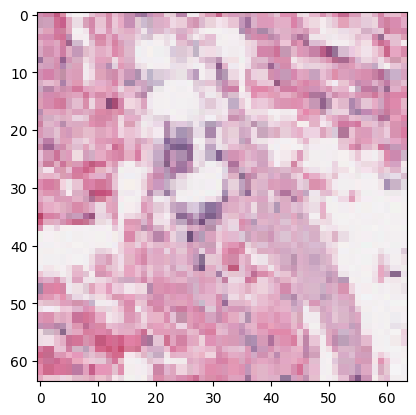

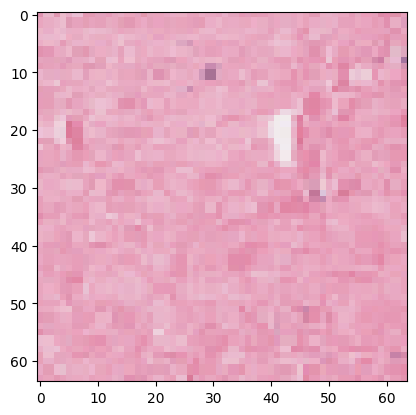

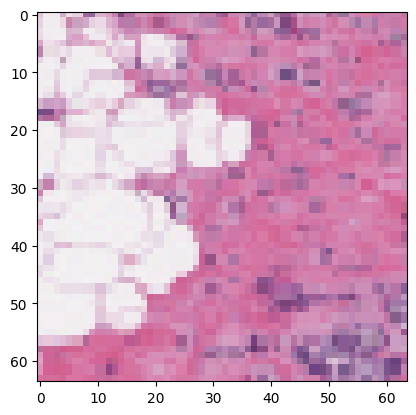

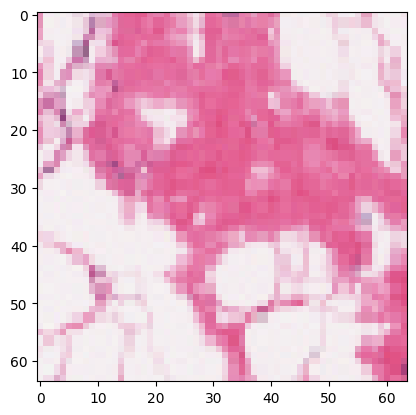

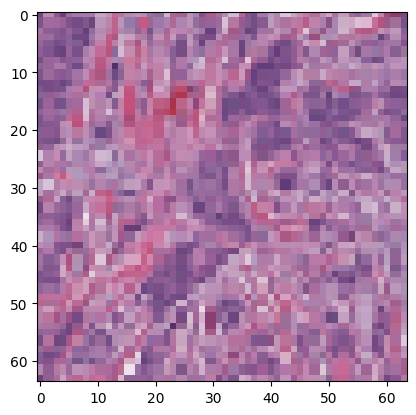

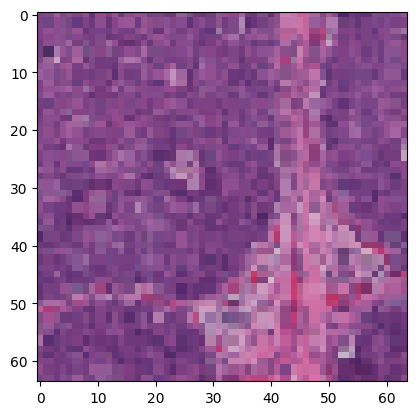

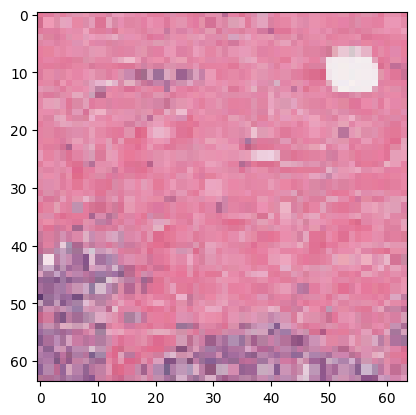

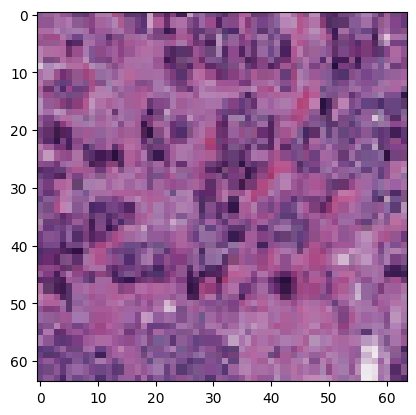

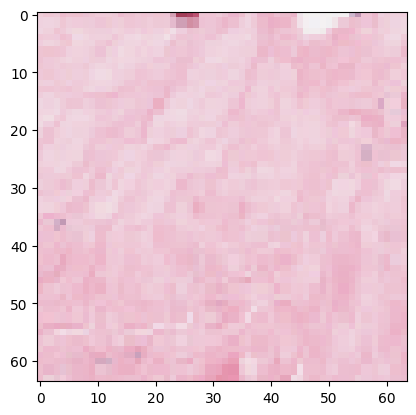

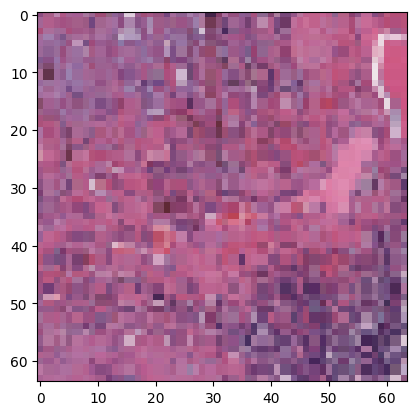

In [112]:
#We can check images for a single batch.
x, y = next(train_data)
#View each image
for i in range (0,15):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [113]:
import torchvision
from torchvision import transforms
import torch.utils.data as data
import numpy as np

In [114]:
#Define root directory with subdirectories
train_dir ="/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised"

In [115]:
#If you want to apply ransforms
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),       # Converts your input image to PyTorch tensor.
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5] )
    ])

In [116]:
train_data_torch = torchvision.datasets.ImageFolder(root=train_dir)

In [117]:
train_data_loader_torch = data.DataLoader(train_data_torch, batch_size=len(train_data_torch))
   

In [118]:
print("Number of train samples: ", len(train_data_torch))    
print("Detected Classes are: ", train_data_torch.class_to_idx) 
# classes are detected by folder structure 

Number of train samples:  277524
Detected Classes are:  {'0': 0, '1': 1}


In [119]:
labels = np.array(train_data_torch.targets)
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[     0 198738]
 [     1  78786]]


In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical  # Corrected import for one-hot encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
 # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [121]:
breastCancer_df = pd.read_csv('/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/image_data.csv')


In [122]:
SIZE=64

In [123]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(breastCancer_df['class'])
LabelEncoder()
print(list(le.classes_))

[0, 1]


In [124]:
breastCancer_df['class'] = le.transform(breastCancer_df["class"]) 
print(breastCancer_df.sample(10))

        class                              relative_path  x_coordinate  \
226235      0  13460/0/13460_idx5_x1351_y1001_class0.png          1351   
152659      0   12933/0/12933_idx5_x1151_y601_class0.png          1151   
261626      0   10308/0/10308_idx5_x2301_y851_class0.png          2301   
124524      0   10301/0/10301_idx5_x401_y1101_class0.png           401   
82033       0  10268/0/10268_idx5_x2151_y1801_class0.png          2151   
11941       1    9261/1/9261_idx5_x2351_y1001_class1.png          2351   
28175       0    9173/0/9173_idx5_x1301_y2301_class0.png          1301   
193634      1   15902/1/15902_idx5_x2701_y601_class1.png          2701   
227747      0    9126/0/9126_idx5_x1051_y1551_class0.png          1051   
207129      0   10303/0/10303_idx5_x1101_y601_class0.png          1101   

        y_coordinate                           image_id  
226235          1001  13460_idx5_x1351_y1001_class0.png  
152659           601   12933_idx5_x1151_y601_class0.png  
261626     

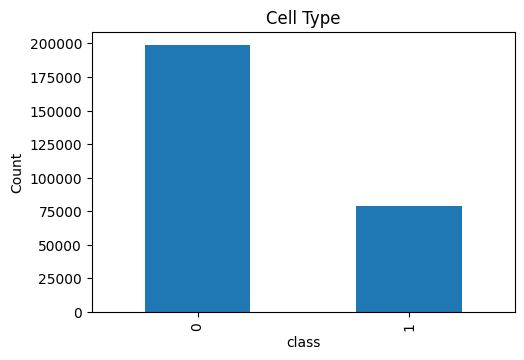

In [125]:
# Data distribution visualization
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(221)
breastCancer_df['class'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type')

plt.show()


In [126]:
print(breastCancer_df['class'].value_counts())

class
0    198738
1     78786
Name: count, dtype: int64


In [127]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = breastCancer_df[breastCancer_df['class'] == 0]
df_1 = breastCancer_df[breastCancer_df['class'] == 1]

n_samples=90000 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 



In [128]:
balanced_df = pd.concat([df_0_balanced, df_1_balanced])

In [129]:
#Check the distribution. All classes should be balanced now.
print(balanced_df['class'].value_counts())

class
0    90000
1    90000
Name: count, dtype: int64


In [130]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/home/garv/Desktop/Others/Accessories/Mini-Project/Breast Cancer/Backend/App/reorganised', '*', '*.png'))}

In [131]:
#Define the path and add as a new column
balanced_df['path'] = breastCancer_df['image_id']
#Use the path to read images.
balanced_df['image_id'] = balanced_df['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

FileNotFoundError: [Errno 2] No such file or directory: '12822_idx5_x201_y451_class0.png'